In [407]:
import control as ct
import matplotlib.pyplot as plt
import sys
import time

s = ct.tf('s')
t = time.time()


In [408]:
Kps, h, d = 1, 5, 0.05
Kg, Tg = 1, 0.8
Kt, Tt = 1, 0.3
R = 0.1

In [409]:
# Feedback loop
droop = R
Kp = 10
Ki = 0.8
Kd = 15

# Transfer function of Generator plant
generator = Kps / (2*h*s + d)
# Defining set point value for frequency
ref = 50

# Transfer functions of PID, Governor, Turbine and Load Change
#e = ref - i
pid = Kp + Ki/s + Kd*s
governor = Kg / (1 + Tg*s)
turbine = Kt / (1 + Tt*s)
delta_p = -0.05/1*s

In [410]:
# open loop of governor and turbine block
ol1 = ct.series(governor,turbine) 

# governor and turbine combined with PID block
control = ct.series(pid,ol1) 

# summing point for Pm and Pl 
summing_point = control - delta_p 

ol2 = ct.series(summing_point,generator)

# system without droop feedback
cl_sys = ct.feedback(ol2,1)

single_area = ref - cl_sys





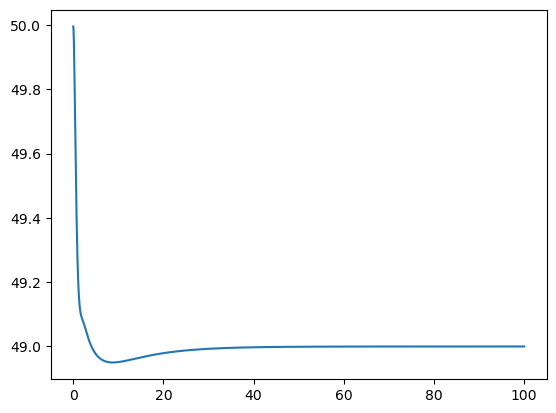

In [411]:
response = ct.step_response(single_area, T = 100)

#i = response.outputs

plt.plot(response.time, response.outputs)

plt.show()